<a href="https://colab.research.google.com/github/somilasthana/deeplearningtutorial/blob/master/Tensorflow_GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
h1_dim = 150
h2_dim = 300
dim = 100
batch_size = 256

In [0]:
def generator(z_noise):
  w1 = tf.Variable(tf.truncated_normal([dim, h1_dim], stddev=0.1), name="w1_g", dtype=tf.float32)
  b1 = tf.Variable(tf.zeros([h1_dim]), name="b1_g", dtype=tf.float32)
  h1 = tf.nn.relu(tf.matmul(z_noise, w1) + b1)
  
  
  w2 = tf.Variable(tf.truncated_normal([h1_dim, h2_dim], stddev=0.1), name="w2_g", dtype=tf.float32)
  b2 = tf.Variable(tf.zeros([h2_dim]), name="b2_g", dtype=tf.float32)
  h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
  
  
  w3 = tf.Variable(tf.truncated_normal([h2_dim, 28*28], stddev=0.1), name="w3_g", dtype=tf.float32)
  b3 = tf.Variable(tf.zeros([28*28]), name="b3_g", dtype=tf.float32)
  h3 = tf.matmul(h2, w3) + b3
  out_gen = tf.nn.tanh(h3)
  
  weights_g = [w1, b1, w2, b2, w3, b3]
  
  return out_gen, weights_g
  

In [0]:
def discriminator(x, out_gen, keep_prob):
  
  x_all = tf.concat([x, out_gen], 0)
  
  w1 = tf.Variable(tf.truncated_normal([28*28, h2_dim], stddev=0.1), name="w1_d", dtype=tf.float32)
  b1 = tf.Variable(tf.zeros([h2_dim]), name="b1_d", dtype=tf.float32)
  h1 = tf.nn.relu(tf.matmul(x_all, w1) + b1)
  h1 = tf.nn.dropout(h1, keep_prob)
  

  w2 = tf.Variable(tf.truncated_normal([h2_dim, h1_dim], stddev=0.1), name="w2_d", dtype=tf.float32)
  b2 = tf.Variable(tf.zeros([h1_dim]), name="b2_d", dtype=tf.float32)
  h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
  h2 = tf.nn.dropout(h2, keep_prob)
  
  
  w3 = tf.Variable(tf.truncated_normal([h1_dim, 1], stddev=0.1), name="w3_d", dtype=tf.float32)
  b3 = tf.Variable(tf.zeros([1]), name="b3_d", dtype=tf.float32)
  h3 = tf.matmul(h2, w3) + b3
  
  y_data = tf.nn.sigmoid(tf.slice(h3, [0, 0], [batch_size, -1], name=None))
  y_fake = tf.nn.sigmoid(tf.slice(h3, [batch_size, 0], [-1, -1], name=None))
  
  weight_d = [w1, b1, w2, b2, w3, b3]
  
  return y_data, y_fake, weight_d


In [29]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
#x = tf.placeholder(tf.float32, [batch_size, 28*28], name="x_data")
#z_noise = tf.placeholder(tf.float32, [batch_size, dim], name="z_prior")
#keep_prob = tf.placeholder(tf.float32, name="keep_prob")

x = tf.placeholder(tf.float32, [batch_size, 28*28], name="x_data")
## Place holder for the noise
z_noise = tf.placeholder(tf.float32, [batch_size,dim], name="z_prior")
## Dropout probability
keep_prob = tf.placeholder(tf.float32, name="keep_prob")

In [0]:
out_gen,weights_g = generator(z_noise)
# Define the ops and weights for Discriminator
y_data, y_fake,weights_d = discriminator(x,out_gen,keep_prob)
## Cost function for Discriminator
discr_loss = -1*tf.reduce_mean(tf.log(y_data) + tf.log(1 - y_fake))
## Cost function for Generator
gen_loss = -1*tf.reduce_mean( tf.log(y_fake))
optimizer = tf.train.AdamOptimizer(0.0001)
d_trainer = optimizer.minimize(discr_loss,var_list=weights_d)
g_trainer = optimizer.minimize(gen_loss,var_list=weights_g)
init = tf.global_variables_initializer()

iter: 2000 cost of discriminator 0.7927396 cost of generator 1.5368342
iter: 3000 cost of discriminator 0.5656269 cost of generator 2.5406845
iter: 4000 cost of discriminator 0.6101285 cost of generator 1.9669242
iter: 5000 cost of discriminator 0.5100028 cost of generator 2.5227005
iter: 6000 cost of discriminator 0.6086934 cost of generator 2.0938349
iter: 7000 cost of discriminator 0.6108038 cost of generator 2.4261603
iter: 8000 cost of discriminator 0.507946 cost of generator 2.420031
iter: 9000 cost of discriminator 0.5742749 cost of generator 2.3434763
iter: 10000 cost of discriminator 0.56843597 cost of generator 2.0637462
iter: 11000 cost of discriminator 0.6907778 cost of generator 1.7424531
iter: 12000 cost of discriminator 0.6552607 cost of generator 1.9906107
iter: 13000 cost of discriminator 0.8030479 cost of generator 1.7214441
iter: 14000 cost of discriminator 0.65979433 cost of generator 1.7857819
iter: 15000 cost of discriminator 0.804716 cost of generator 1.6333088
i

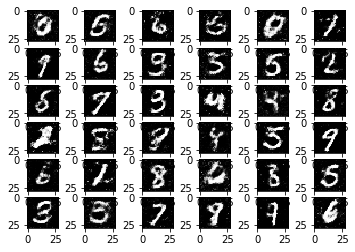

In [54]:
saver = tf.train.Saver()
sess = tf.Session()
sess.run(init)
z_sample = np.random.uniform(-1, 1, size=(batch_size,dim)).astype(np.float32)

for i in range(50000):
  batch_x, _ = mnist.train.next_batch(batch_size)
  x_value = 2*batch_x.astype(np.float32) - 1
  z_value = np.random.uniform(-1, 1, size=(batch_size, dim)).astype(np.float32)
  sess.run(d_trainer, feed_dict={x: x_value, z_noise: z_value, keep_prob:0.7})
  sess.run(g_trainer, feed_dict={x: x_value, z_noise: z_value, keep_prob:0.7})
  
  if (i % 1000 == 0) and(i > 1000):
    c1, c2 = sess.run([discr_loss, gen_loss], feed_dict={x: x_value, z_noise: z_value, keep_prob:0.7})
    print ('iter:',i,'cost of discriminator',c1, 'cost of generator',c2)
    
out_val_img = sess.run(out_gen, feed_dict={z_noise: z_sample})
img = 0.5*(out_val_img[3, :]+1)
img = np.reshape(img, (28, 28))
plt.imshow(img*255)
saver.save(sess, "newgan_", global_step=i)
imgs = 0.5*(out_val_img + 1)

for k in range(36):
  plt.subplot(6, 6, k+1)
  image = np.reshape(imgs[k], (28 , 28))
  plt.imshow(image, cmap="gray")